# Exercise from Stratascratch  

Imagine you are a security or defense analyst. Analyze the data and draw conclusions on the distribution and nature of terrorist incidents recorded around the world.  
In your analysis, include maps that visualize the location of different incidents. Your analysis may also provide answers to the following questions:  

1. How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?  

2.  Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?  

3. What are the most common methods of attacks? Does it differ in various regions or in time?  

4. Plot the locations of attacks on a map to visualize their regional spread  

You are also free to explore the data further and extract additional insights other than the questions above.  

Link: https://platform.stratascratch.com/data-projects/terrorism-hotspots

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

# Importing Data

In [2]:
terrorism_df = pd.read_csv('./datasets/globalterrorismdb_0718dist.zip', encoding='ISO-8859-1', compression="zip") 
terrorism_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country   
0  197000000001   1970       7     2        NaN         0        NaN       58  \
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource   
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS  \
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

# EDA

In [3]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


The dataset is really huge, it has almost 200k rows and more than 100 columns. 

In [4]:
len(terrorism_df.columns[np.where(terrorism_df.isna().sum() != 0)])

106

Most of the columns show missing values. Fortunately the project must be carried with only few of them.

Columns to use for the analysis:  

**success** - Success of a terrorist strike  

**suicide** - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide  

**attacktype1** - The general method of attack  

**attacktype1_txt**- The general method of attack and broad class of tactics used.  

**targtype1_txt** - The general type of target/victim  

**targsubtype1_txt**- - The more specific target category  

**target1**- - The specific person, building, installation that was targeted and/or victimized  

**natlty1_txt**- - The nationality of the target that was attacked  

**gname**- - The name of the group that carried out the attack  

**gsubname**- - Additional details about group that carried out the attack like fractions  

**nperps**- - The total number of terrorists participating in the incident  

**weaptype1_txt**- - General type of weapon used in the incident  

**weapsubtype1_txt**- - More specific value for most of the Weapon Types  

**nkill**- - The number of total confirmed fatalities for the incident  

**nkillus**- - The number of U.S. citizens who died as a result of the incident  

In [5]:
t_df = terrorism_df[['iyear','region_txt','success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targsubtype1_txt', 'target1', 'natlty1_txt', 'gname', 'gsubname',
                     'nperps', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nkillus', 'country_txt' ,'city' ,'latitude', 'longitude']] 
t_df.head()

iyear                   region_txt  success  suicide  attacktype1   
0   1970  Central America & Caribbean        1        0            1  \
1   1970                North America        1        0            6   
2   1970               Southeast Asia        1        0            1   
3   1970               Western Europe        1        0            3   
4   1970                    East Asia        1        0            7   

                  attacktype1_txt   
0                   Assassination  \
1     Hostage Taking (Kidnapping)   
2                   Assassination   
3               Bombing/Explosion   
4  Facility/Infrastructure Attack   

                                    targsubtype1_txt                  target1   
0                                     Named Civilian             Julio Guzman  \
1  Diplomatic Personnel (outside of embassy, cons...  Nadine Chaval, daughter   
2                    Radio Journalist/Staff/Facility                 Employee   
3                                  Embassy/Consulate             U.S. Embassy   
4                                  Embassy/Consulate           U.S. Consulate   

          natlty1_txt                               gname gsubname  nperps   
0  Dominican Republic                              MANO-D      NaN     NaN  \
1             Belgium  23rd of September Communist League      NaN     7.0   
2       United States                             Unknown      NaN     NaN   
3       United States                             Unknown      NaN     NaN   
4       United States                             Unknown      NaN     NaN   

  weaptype1_txt        weapsubtype1_txt  nkill  nkillus         country_txt   
0       Unknown                     NaN    1.0      NaN  Dominican Republic  \
1       Unknown                     NaN    0.0      NaN              Mexico   
2       Unknown                     NaN    1.0      NaN         Philippines   
3    Explosives  Unknown Explosive Type    NaN      NaN              Greece   
4    Incendiary                     NaN    NaN      NaN               Japan   

            city   latitude   longitude  
0  Santo Domingo  18.456792  -69.951164  
1    Mexico city  19.371887  -99.086624  
2        Unknown  15.478598  120.599741  
3         Athens  37.997490   23.762728  
4        Fukouka  33.580412  130.396361

In [6]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   region_txt        181691 non-null  object 
 2   success           181691 non-null  int64  
 3   suicide           181691 non-null  int64  
 4   attacktype1       181691 non-null  int64  
 5   attacktype1_txt   181691 non-null  object 
 6   targsubtype1_txt  171318 non-null  object 
 7   target1           181053 non-null  object 
 8   natlty1_txt       180132 non-null  object 
 9   gname             181691 non-null  object 
 10  gsubname          5890 non-null    object 
 11  nperps            110576 non-null  float64
 12  weaptype1_txt     181691 non-null  object 
 13  weapsubtype1_txt  160923 non-null  object 
 14  nkill             171378 non-null  float64
 15  nkillus           117245 non-null  float64
 16  country_txt       18

# Question 1  

How has the number of terrorist activities changed over the years?   
Are there certain regions where this trend is different from the global averages?

In [7]:
t_df.iyear.value_counts().sort_index().head()

iyear
1970    651
1971    471
1972    568
1973    473
1974    581
Name: count, dtype: int64

In [8]:
yearly_attacks = pd.DataFrame(t_df.iyear.value_counts().sort_index().reset_index()).rename(columns={'iyear':'Year', 'count':'Attacks'})
yearly_attacks.head()

Year  Attacks
0  1970      651
1  1971      471
2  1972      568
3  1973      473
4  1974      581

It is possible to show it using a lineplot.

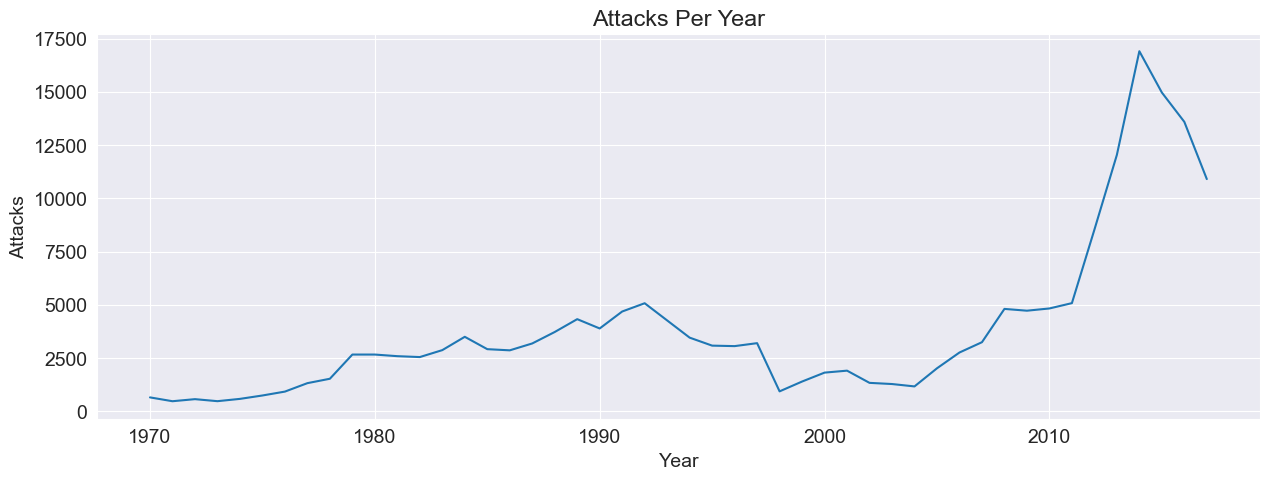

In [9]:
sns.lineplot(data=yearly_attacks, x='Year', y='Attacks') 
plt.title('Attacks Per Year');

Terrorism attacks have been quite stable until 2010, where they escalated quickly.  
The reasons behind it can be multiple, but are was it the same for all the Countries?

In [19]:
att_per_country = t_df.groupby(['iyear', 'region_txt'], as_index=False).attacktype1.count().rename(columns={'iyear':'Year', 'region_txt':'Region', 
                                                                                           'attacktype1':'Attacks'}) 
att_per_country.head()

Year                       Region  Attacks
0  1970        Australasia & Oceania        1
1  1970  Central America & Caribbean        7
2  1970                    East Asia        2
3  1970               Eastern Europe       12
4  1970   Middle East & North Africa       28

In [20]:
terrorism_df.region_txt.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

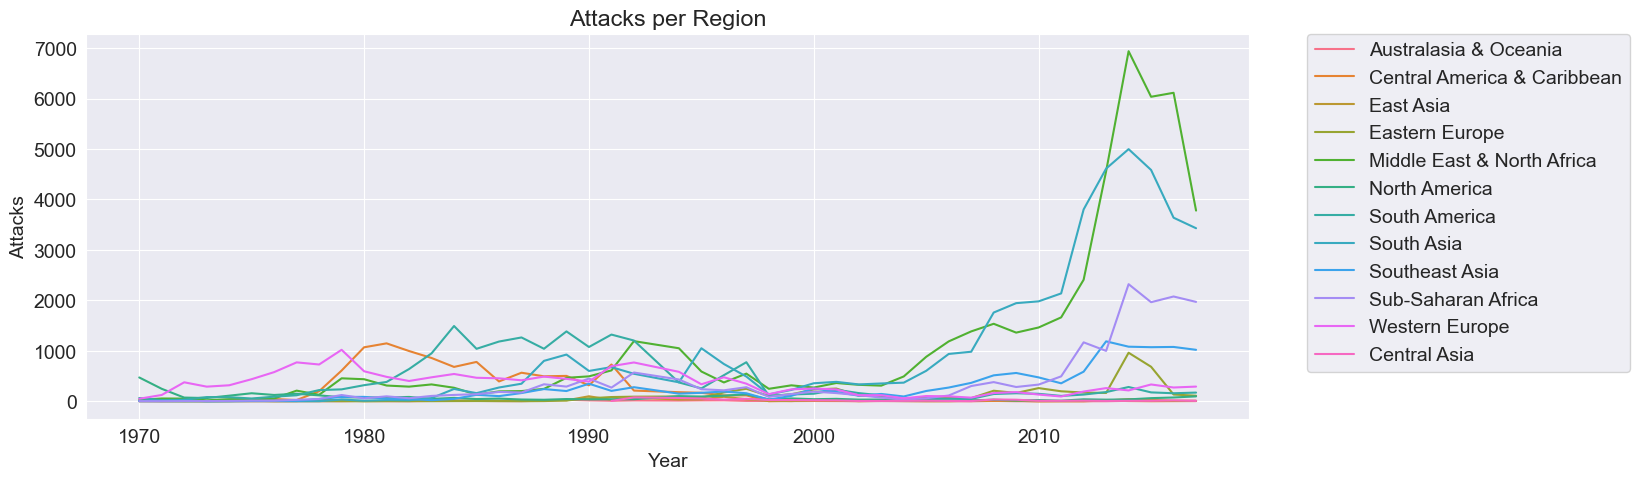

In [21]:
sns.lineplot(data=att_per_country, x='Year', y='Attacks', hue='Region') 
plt.title('Attacks per Region') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

Comparing the two trends.

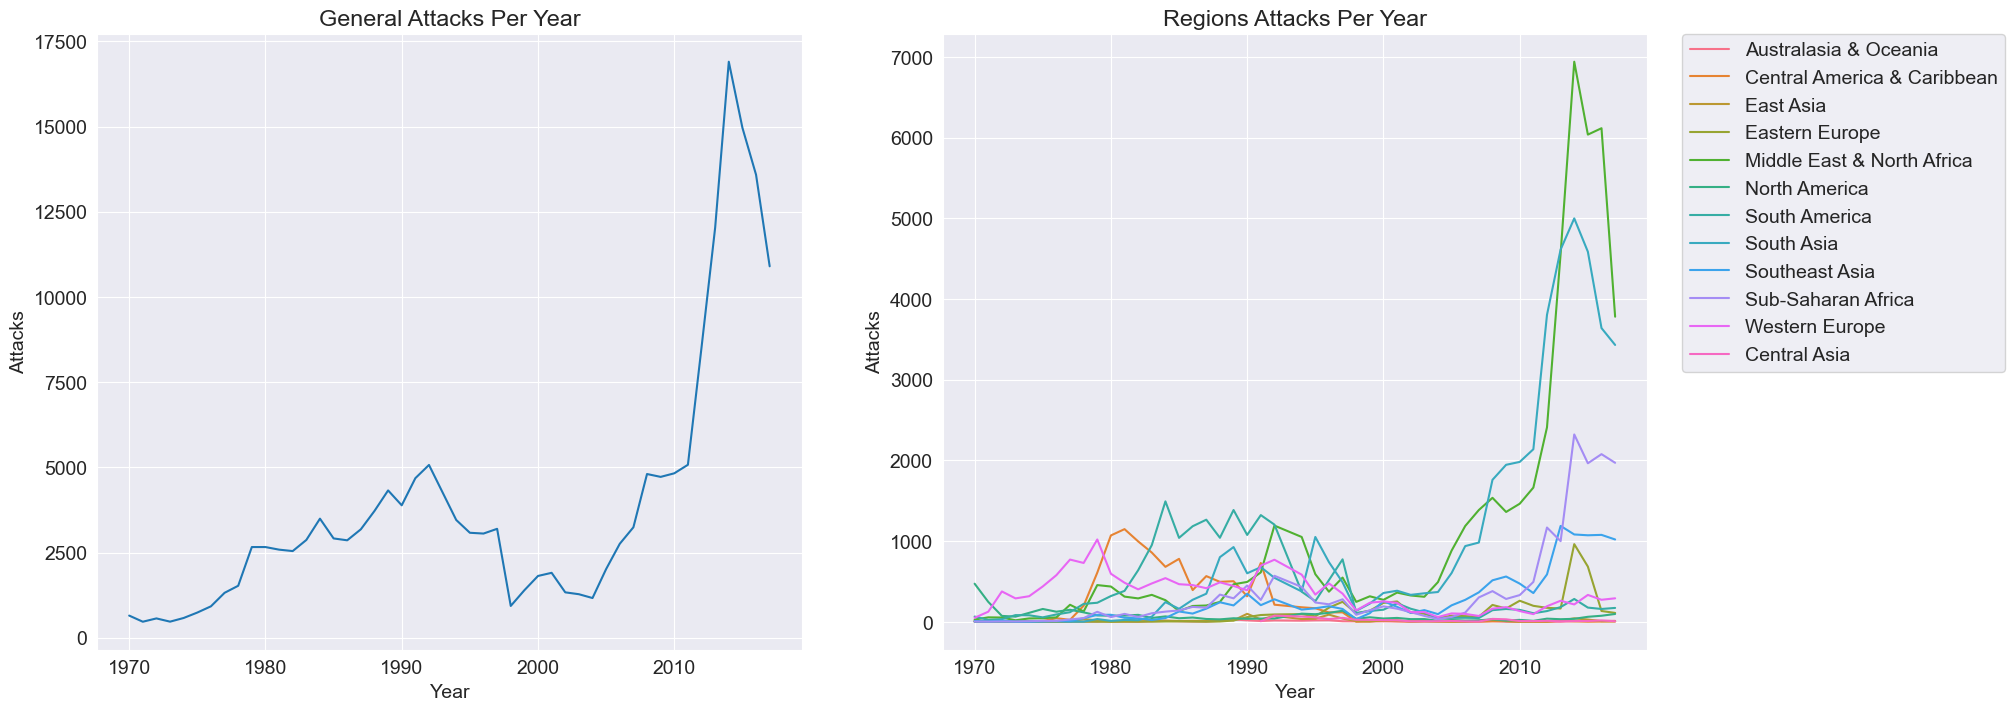

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,8)) 

ax[0].set_title('General Attacks Per Year')
sns.lineplot(data=yearly_attacks, x='Year', y='Attacks', ax=ax[0]) 

ax[1].set_title('Regions Attacks Per Year') 
sns.lineplot(data=att_per_country, x='Year', y='Attacks', hue='Region', ax=ax[1])
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

The trends look similar, but there are huge differences in the absolute number of regions. By the way, almost all of them have experienced terrorism activities increase since 2010.

# Question 2  

Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?  

A possbile way to discover this correlation could be by grouping by the year to find the total number of incidents and, always grouping by year, summing the victims number. 

In [23]:
years_kills = pd.concat([t_df.groupby('iyear').success.count(), t_df.groupby('iyear').nkill.sum()], axis=1).rename(
    columns={'success':'Incidents', 'nkill':'Casualties'})

years_kills.head()

Incidents  Casualties
iyear                       
1970         651       174.0
1971         471       173.0
1972         568       566.0
1973         473       370.0
1974         581       539.0

Plotting the correlation. 

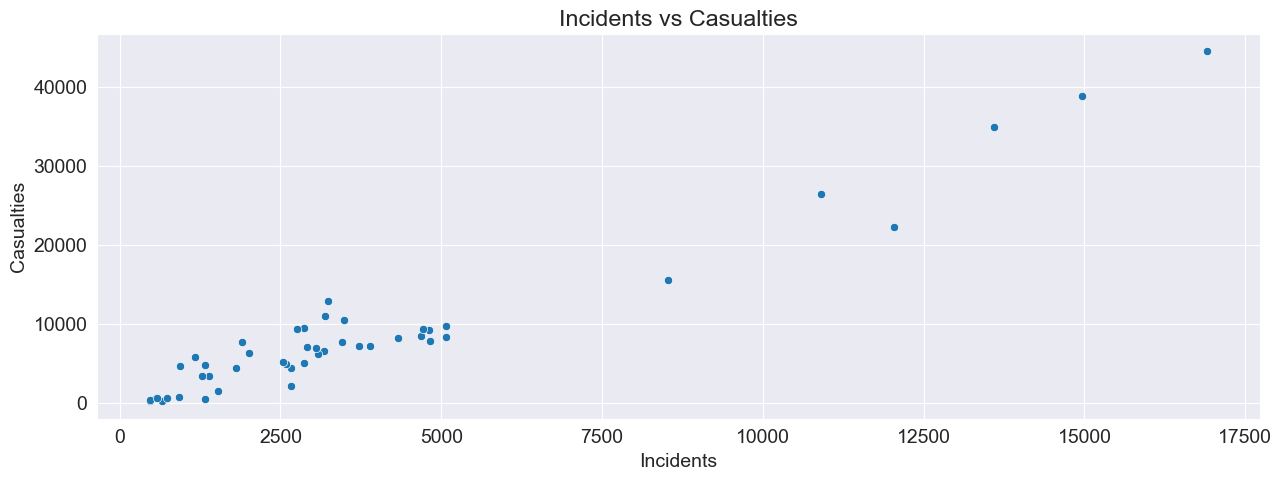

In [24]:
sns.scatterplot(data=years_kills, x='Incidents', y='Casualties')
plt.title('Incidents vs Casualties');

In [25]:
years_kills.Incidents.corr(years_kills.Casualties, method='pearson')

0.966004953717957

As it was already possible to see from the graph, the r-pearson confirms that the correlation between incidents and casualties is strong and positive.  
It seems that the highest the number of incidents, the highest the number of victims.  
When the number of attacks increases, the number of deaths increases, meaning that they are not only more in number, but in violence too.  
About the outliers, the last six points appear to be very far from the distribution. Probably, they are referred to years close to 2010, when the number of attacks started increasing dramatically.  

In [26]:
years_kills[years_kills.Incidents > 7500]

Incidents  Casualties
iyear                       
2012        8522     15497.0
2013       12036     22273.0
2014       16903     44490.0
2015       14965     38853.0
2016       13587     34871.0
2017       10900     26445.0

The table above confirms the previous guess, after 2012 the number of attacks increased rapidly.

To provide a different view of the phenomenon, the same process can be performed by grouping per year and per region.   
This will provide a higher number of observations and will make possible to understand where the highest number of attacks has been performed. 

In [28]:
kills_region = t_df.groupby(['iyear', 'region_txt'], as_index=False).success.count().merge(
    t_df.groupby(['iyear', 'region_txt']).nkill.sum(), on=['iyear', 'region_txt']).rename(columns={'success':'Attacks', 'nkill':'Fatalities'})
kills_region

iyear                   region_txt  Attacks  Fatalities
0     1970        Australasia & Oceania        1         0.0
1     1970  Central America & Caribbean        7         3.0
2     1970                    East Asia        2         0.0
3     1970               Eastern Europe       12         0.0
4     1970   Middle East & North Africa       28         1.0
..     ...                          ...      ...         ...
524   2017                South America      172       101.0
525   2017                   South Asia     3430      7664.0
526   2017               Southeast Asia     1020       811.0
527   2017           Sub-Saharan Africa     1970      6712.0
528   2017               Western Europe      291        83.0

[529 rows x 4 columns]

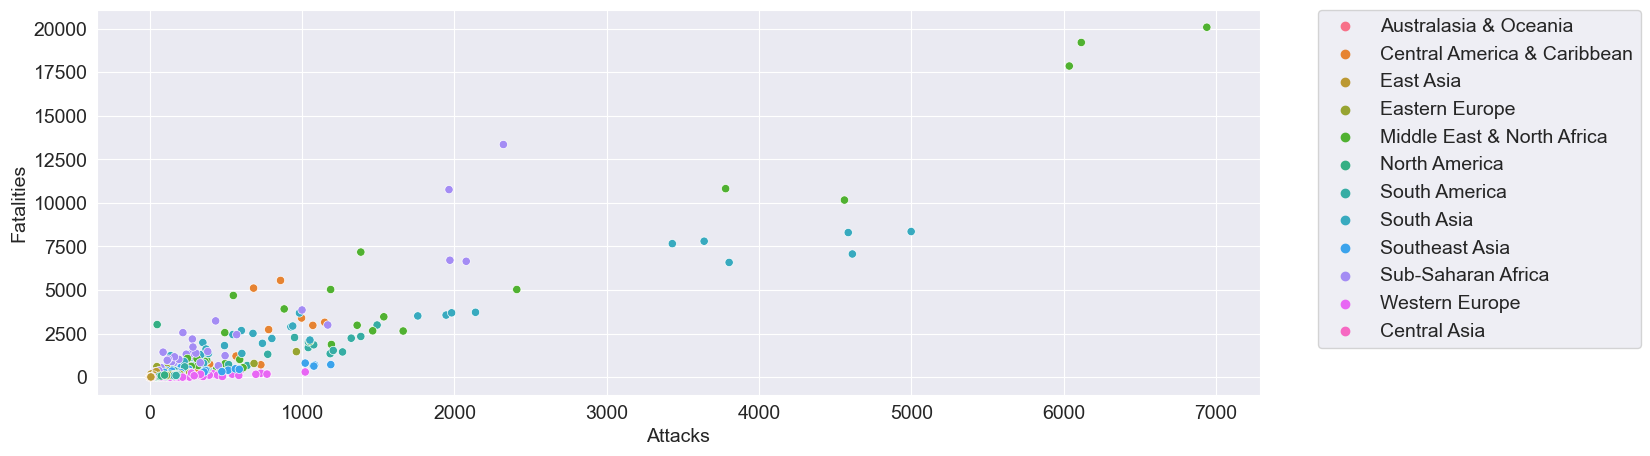

In [29]:
sns.scatterplot(data=kills_region, x='Attacks', y='Fatalities', hue='region_txt')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [32]:
kills_region.Attacks.corr(kills_region.Fatalities, method='pearson')

0.9119248828577902

It is confirmed the strong and positive relationships between the two variables. In particular, South Asia and Middle East & North Africa appear as the regions with the highest number of attacks and deaths.

# Question 3   

What are the most common methods of attacks? Does it differ in various regions or in time?

In [40]:
attacks_order = t_df.attacktype1_txt.value_counts().sort_values(ascending=False)
attacks_order = t_df.attacktype1_txt.value_counts().sort_values(ascending=False).index 

attacks_order

Index(['Bombing/Explosion', 'Armed Assault', 'Assassination',
       'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack',
       'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)',
       'Hijacking'],
      dtype='object', name='attacktype1_txt')

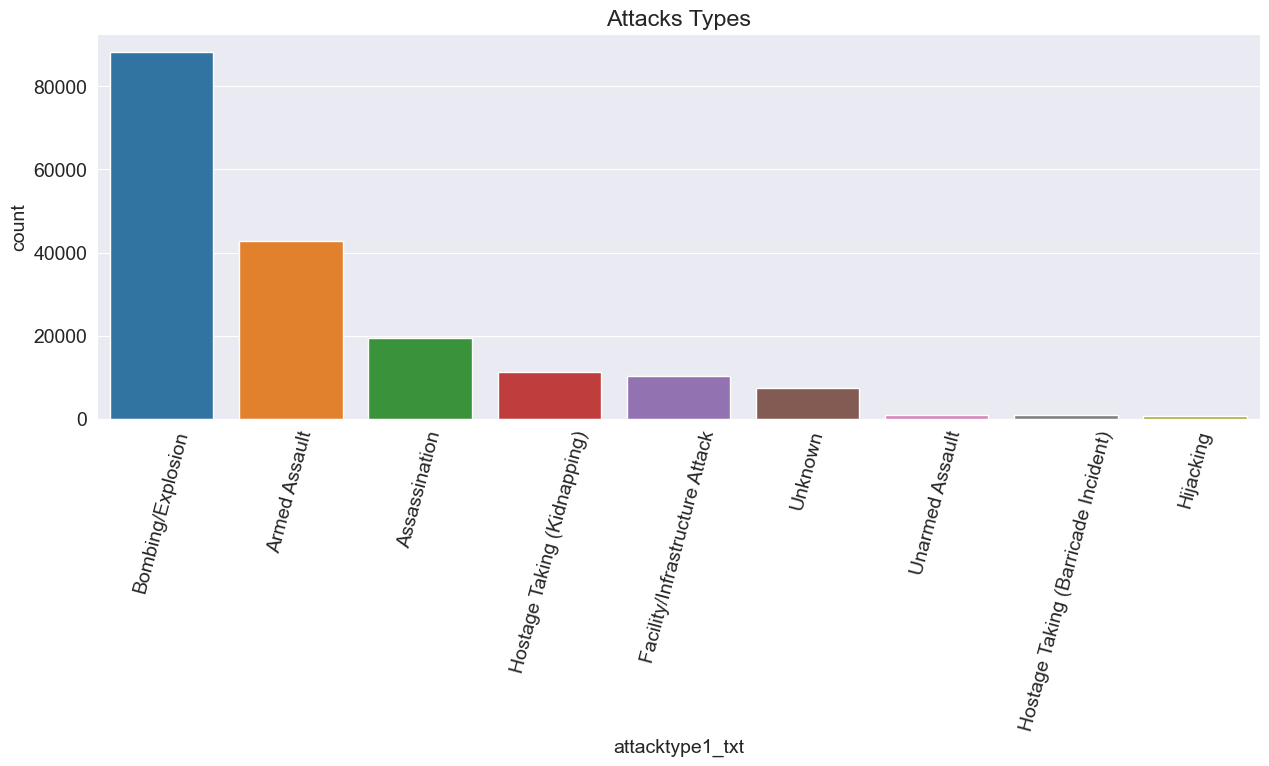

In [42]:
attacks_order = t_df.attacktype1_txt.value_counts().sort_values(ascending=False).index 

sns.countplot(data=t_df, x='attacktype1_txt', order=attacks_order) 
plt.xticks(rotation=75)
plt.title('Attacks Types');

Bombing/explosion is, by far, the most common attack type.  

Is it different in times and region? 

## Region

In [52]:
regions_attack_type = t_df.groupby('region_txt', as_index=False).attacktype1_txt.value_counts().rename(
    columns={'region_txt':'Region', 'attacktype1_txt':'Attack_Type', 'count':'Count'})

regions_attack_type

Region                          Attack_Type  Count
0    Australasia & Oceania                    Bombing/Explosion     75
1    Australasia & Oceania       Facility/Infrastructure Attack     71
2    Australasia & Oceania                        Armed Assault     51
3    Australasia & Oceania                        Assassination     36
4    Australasia & Oceania                              Unknown     16
..                     ...                                  ...    ...
103         Western Europe          Hostage Taking (Kidnapping)    269
104         Western Europe                              Unknown    265
105         Western Europe                      Unarmed Assault    148
106         Western Europe  Hostage Taking (Barricade Incident)     89
107         Western Europe                            Hijacking     67

[108 rows x 3 columns]

Plotting it. 

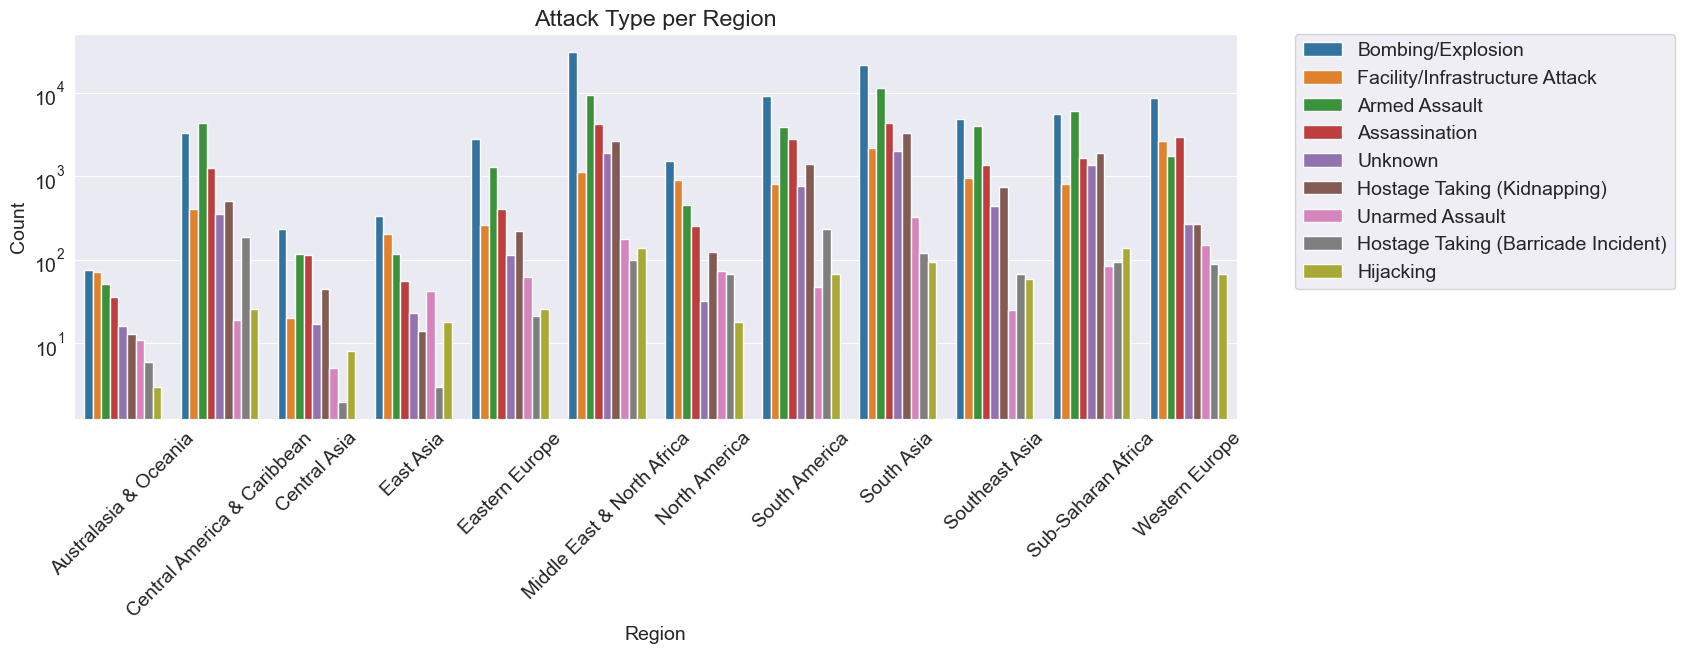

In [64]:
sns.barplot(data=regions_attack_type, x='Region', y='Count', hue='Attack_Type')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Attack Type per Region')
plt.yscale('log')

It has been necessary to scale y-axis values on a logarithmic scale to obtain more interpretable results.  
By the way, bombing/explosion appears to be dominant in almost all the regions. Some exceptions are the Central America & Carribean and Sub-Saharan Africa, where the armed assault appears to be the dominant one. 

## Time Period

In [24]:
years_types = t_df.groupby('iyear', as_index=False).attacktype1_txt.value_counts().rename(
    columns={'iyear':'Year', 'attacktype1_txt':'Attack', 'count':'Count'})  

years_types

Year                               Attack  Count
0    1970                    Bombing/Explosion    333
1    1970       Facility/Infrastructure Attack    174
2    1970                        Armed Assault     61
3    1970          Hostage Taking (Kidnapping)     38
4    1970                        Assassination     22
..    ...                                  ...    ...
411  2017                        Assassination    816
412  2017       Facility/Infrastructure Attack    751
413  2017                      Unarmed Assault    101
414  2017  Hostage Taking (Barricade Incident)     82
415  2017                            Hijacking     58

[416 rows x 3 columns]

Plotting it. 

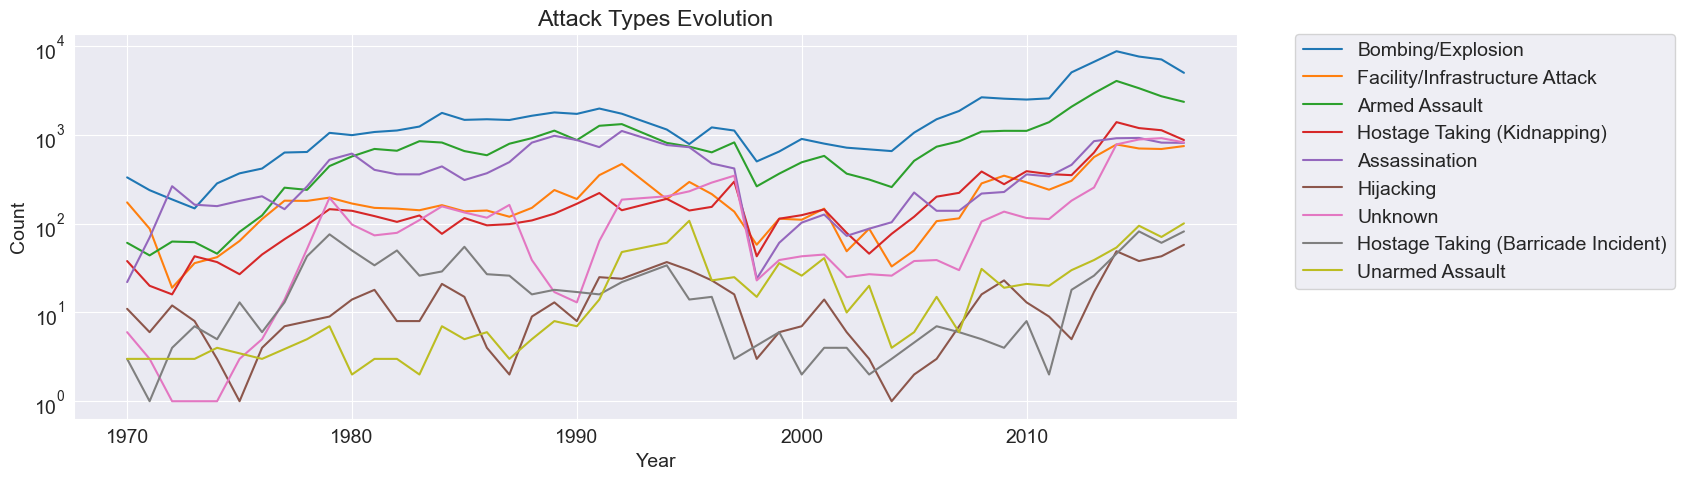

In [25]:
sns.lineplot(data=years_types, x='Year', y='Count', hue='Attack') 
plt.title('Attack Types Evolution') 
plt.yscale('log') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

Bombing/explosion and armed assault have always been the most popular ones.  
A positive trend is shown by "Unknown" and "Kidnapping" categories, which escalated quickly during the years.

# Question 4  

Plot the locations of attacks on a map to visualize their regional spread.  

For this question it will be taken into consideration 2017 only. 

In [68]:
import geopandas as gpd 
import folium  
from folium import Choropleth
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

Filtering 2017 data only. 

In [69]:
t_2017_df = t_df[t_df.iyear == 2017]
t_2017_df.head(3)

iyear          region_txt  success  suicide  attacktype1   
170340   2017          South Asia        1        0            6  \
170669   2017  Sub-Saharan Africa        1        0            2   
170697   2017  Sub-Saharan Africa        1        0            2   

                    attacktype1_txt          targsubtype1_txt   
170340  Hostage Taking (Kidnapping)              Construction  \
170669                Armed Assault            Named Civilian   
170697                Armed Assault  Village/City/Town/Suburb   

                                        target1   
170340                     Construction Workers  \
170669  Civilians: Haroun Yousif, Hamid Ibrahim   
170697                                  Village   

                             natlty1_txt                           gname   
170340                       Afghanistan                         Taliban  \
170669                             Sudan                         Unknown   
170697  Democratic Republic of the Congo  Allied Democratic Forces (ADF)   

       gsubname  nperps weaptype1_txt             weapsubtype1_txt  nkill   
170340      NaN   -99.0      Firearms             Unknown Gun Type    0.0  \
170669      NaN   -99.0      Firearms             Unknown Gun Type    2.0   
170697      NaN   -99.0         Melee  Knife or Other Sharp Object    7.0   

        nkillus                       country_txt        city   latitude   
170340      0.0                       Afghanistan  Takhta Pul  31.320556  \
170669      0.0                             Sudan     Fantaga  12.921007   
170697      0.0  Democratic Republic of the Congo      Saboko   1.452372   

        longitude  
170340  65.961111  
170669  24.318324  
170697  29.875162

In [71]:
print(f'Missing Latitude: {t_2017_df.latitude.isna().sum()}') 
print(f'Missing Longitude: {t_2017_df.longitude.isna().sum()}')

Missing Latitude: 47
Missing Longitude: 47


47 values are missing. It is possible to gather them anyway.  
Firstly, let's check what are the missing locations. 

In [72]:
t_2017_df[t_2017_df.latitude.isna()].index == t_2017_df[t_2017_df.longitude.isna()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Latitudes and longitudes are missing on the same observations. It is important to understand in which locations the missing values shall be replaced.

In [73]:
t_2017_df[t_2017_df.latitude.isna()].country_txt.isna().sum()

0

Since the city of the unknown latitudes and longitudes is almost always "NaN", a possible solution could be to use the Country coordinates. Despite the result is less accurate, it allows to not waste data. 

Seleceting the missing values and dropping them from the dataframe. 

In [74]:
lat_nan = t_2017_df[t_2017_df.latitude.isna()]  

t_2017_df.drop(index=lat_nan.index, inplace=True) 

print(f'Missing Latitude: {t_2017_df.latitude.isna().sum()}') 

Missing Latitude: 0


Now, it is time to work on the missing values dataset. 

In [89]:
# Defining the geolocator 
geolocator = Nominatim(user_agent='kaggle_learn') 

# Creating the function 
def location_finder(row): 
    try: 
        point = geolocator.geocode(row).point 
        return pd.Series({'Latitude': point.latitude, 'Longitude':point.longitude})
    except: 
        return pd.Series({'Latitude': 3, 'Longitude': 3})

In [90]:
w = lat_nan.country_txt.values[0]

p = geolocator.geocode(w).point

In [91]:
lat_nan.country_txt

170889                    Cameroon
171190                South Africa
171283                    Colombia
171284                    Colombia
171285                    Colombia
171286                    Colombia
171287                    Colombia
171288                    Colombia
171289                    Colombia
171396                        Mali
171530                        Mali
172199                        Mali
172826    Central African Republic
172879                    Pakistan
173057                 Afghanistan
173058                       Yemen
173150                       Yemen
173188                        Iraq
173399                       Yemen
173400                       Yemen
173858                      Turkey
174226                     Somalia
174417                    Ethiopia
174432                        Iraq
175139                 Afghanistan
175619                        Iraq
177289                   Argentina
177327                        Mali
177750              

Checking if every latitude  and longitude have been taken properly.  

In [ ]:
print(f'Missing Latitude: {lat_nan.latitude.isna().sum()}') 

Missing Latitude: 0


Adding to the original dataframe.  

In [77]:
t_2017_df = pd.concat([t_2017_df, lat_nan]).sort_index() 
t_2017_df.head(3)

iyear          region_txt  success  suicide  attacktype1   
170340   2017          South Asia        1        0            6  \
170669   2017  Sub-Saharan Africa        1        0            2   
170697   2017  Sub-Saharan Africa        1        0            2   

                    attacktype1_txt          targsubtype1_txt   
170340  Hostage Taking (Kidnapping)              Construction  \
170669                Armed Assault            Named Civilian   
170697                Armed Assault  Village/City/Town/Suburb   

                                        target1   
170340                     Construction Workers  \
170669  Civilians: Haroun Yousif, Hamid Ibrahim   
170697                                  Village   

                             natlty1_txt                           gname   
170340                       Afghanistan                         Taliban  \
170669                             Sudan                         Unknown   
170697  Democratic Republic of the Congo  Allied Democratic Forces (ADF)   

       gsubname  nperps weaptype1_txt             weapsubtype1_txt  nkill   
170340      NaN   -99.0      Firearms             Unknown Gun Type    0.0  \
170669      NaN   -99.0      Firearms             Unknown Gun Type    2.0   
170697      NaN   -99.0         Melee  Knife or Other Sharp Object    7.0   

        nkillus                       country_txt        city   latitude   
170340      0.0                       Afghanistan  Takhta Pul  31.320556  \
170669      0.0                             Sudan     Fantaga  12.921007   
170697      0.0  Democratic Republic of the Congo      Saboko   1.452372   

        longitude  
170340  65.961111  
170669  24.318324  
170697  29.875162

## Creating a heatmap

In [95]:
map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)  

HeatMap(data=dr[['latitude', 'longitude']], radius=10).add_to(map) 

map

## Creating a choroplet map

Counting the number of attacks. 

In [37]:
t_2017_countries = t_2017_df.groupby('country_txt', as_index=False).success.count().sort_values('success',ascending=False).rename(
    columns={'country_txt':'Country', 'success':'Attacks'})
t_2017_countries.head()

Country  Attacks
38         Iraq     2466
0   Afghanistan     1414
35        India      966
67     Pakistan      719
71  Philippines      692

Finding latitude and longitude.

In [44]:
lst_geocoder_cannot_retrieve = []
for x in t_2017_countries.Country:
    print(x)
    tmp_obj = geolocator.geocode(x)
    if tmp_obj:
        print(tmp_obj.point)
    else:
        lst_geocoder_cannot_retrieve.append(x)

Iraq
33 5m 44.0855s N, 44 10m 29.919s E
Afghanistan
33 46m 4.8234s N, 66 14m 18.65s E
India
22 21m 4.01328s N, 78 40m 3.87408s E
Pakistan
30 19m 51.0244s N, 71 14m 50.9964s E
Philippines
12 45m 1.25496s N, 122 43m 52.3564s E
Somalia
8 22m 3.63756s N, 49 5m 0.2976s E
Nigeria
9 36m 0.12924s N, 7 59m 59.8996s E
Nepal
28 6m 30.2144s N, 84 5m 30.17s E
Syria
34 38m 24.67s N, 39 2m 57.8782s E
Yemen
16 20m 49.6475s N, 47 53m 29.4976s E
Egypt
26 15m 14.5775s N, 29 16m 3.16884s E
Libya
26 49m 24.4099s N, 18 7m 25.2203s E
Turkey
38 57m 35.1338s N, 34 55m 29.8751s E
Thailand
14 53m 49.8916s N, 100 49m 57.828s E
Democratic Republic of the Congo
2 58m 53.1638s S, 23 49m 20.149s E
Mali
16 22m 12.1292s N, 2 17m 24.086s W
United Kingdom
54 42m 8.4762s N, 3 16m 35.6711s W
Colombia
4 5m 59.7012s N, 72 54m 31.7279s W
Myanmar
17 10m 30.1782s N, 95 59m 59.8747s E
Sudan
14 35m 3.99984s N, 29 29m 30.3688s E
Kenya
1 26m 31.0859s N, 38 25m 53.031s E
Cameroon
4 36m 45.1879s N, 13 9m 12.892s E
West Bank and Gaza 

In [45]:
print(f"List of coordinates that the geocoder cannot retrieve: {lst_geocoder_cannot_retrieve}")

List of coordinates that the geocoder cannot retrieve: ['West Bank and Gaza Strip']


It seems that the geocoder cannot retrieve the Gaza Strip coordinates.  
Let's try with another name.

In [47]:
print(f"Gaza Strip coordinates: {geolocator.geocode('Gaza Strip').point}") 
print(f"West Bank coordinates: {geolocator.geocode('West Bank').point}")

Gaza Strip coordinates: 31 26m 35.6042s N, 34 21m 36.0252s E
West Bank coordinates: 32 1m 31.6877s N, 35 17m 19.707s E


The geocoder can locate the two territories separately, but not them together.  
To solve this problem it is possible to replace the entire name "West Bank and Gaza Strip" with only one between them.  
Despite they are two different territories, their location is quite similar. 

In [48]:
t_2017_countries.replace('West Bank and Gaza Strip', 'Gaza Strip', inplace=True) 

In [49]:
t_2017_countries[['Latitude', 'Longitude']] = t_2017_countries.Country.apply(location_finder) 
t_2017_countries.head()

Country  Attacks   Latitude   Longitude
38         Iraq     2466  33.095579   44.174977
0   Afghanistan     1414  33.768006   66.238514
35        India      966  22.351115   78.667743
67     Pakistan      719  30.330840   71.247499
71  Philippines      692  12.750349  122.731210

Storing it.

In [50]:
t_2017_countries.to_csv('t_2017_countries.csv', index=None)

Computing the Countries' geometry.

In [86]:
t_2017_countries = pd.read_csv('./t_2017_countries.csv')

In [54]:
world_countries = gpd.read_file('./datasets/world-administrative-boundaries.shp')
world_countries.head()

iso3                 status color_code                      name continent   
0  MNP           US Territory        USA  Northern Mariana Islands   Oceania  \
1  NaN  Sovereignty unsettled        RUS             Kuril Islands      Asia   
2  FRA           Member State        FRA                    France    Europe   
3  SRB           Member State        SRB                    Serbia    Europe   
4  URY           Member State        URY                   Uruguay  Americas   

            region iso_3166_1_               french_shor   
0       Micronesia          MP  Northern Mariana Islands  \
1     Eastern Asia         NaN             Kuril Islands   
2   Western Europe          FR                    France   
3  Southern Europe          RS                    Serbie   
4    South America          UY                   Uruguay   

                                            geometry  
0  MULTIPOLYGON (((145.63331 14.91236, 145.62412 ...  
1  MULTIPOLYGON (((146.68274 43.70777, 146.66664 ...  
2  MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...  
3  POLYGON ((20.26102 46.11485, 20.31403 46.06986...  
4  POLYGON ((-53.37430 -33.74067, -53.39917 -33.7...

In [55]:
world_countries[world_countries.name.isin(t_2017_countries.Country.unique())]

iso3        status color_code       name continent   
2    FRA  Member State        FRA     France    Europe  \
3    SRB  Member State        SRB     Serbia    Europe   
8    DZA  Member State        DZA    Algeria    Africa   
13   AUT  Member State        AUT    Austria    Europe   
20   JAM  Member State        JAM    Jamaica  Americas   
..   ...           ...        ...        ...       ...   
246  SWE  Member State        SWE     Sweden    Europe   
248  AGO  Member State        AGO     Angola    Africa   
250  AUS  Member State        AUS  Australia   Oceania   
253  PER  Member State        PER       Peru  Americas   
255  PRY  Member State        PRY   Paraguay  Americas   

                        region iso_3166_1_ french_shor   
2               Western Europe          FR      France  \
3              Southern Europe          RS      Serbie   
8              Northern Africa          DZ    AlgÃ©rie   
13              Western Europe          AT    Autriche   
20                   Caribbean          JM   JamaÃ¯que   
..                         ...         ...         ...   
246            Northern Europe          SE      SuÃ¨de   
248              Middle Africa          AO      Angola   
250  Australia and New Zealand          AU   Australie   
253              South America          PE      PÃ©rou   
255              South America          PY    Paraguay   

                                              geometry  
2    MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...  
3    POLYGON ((20.26102 46.11485, 20.31403 46.06986...  
8    POLYGON ((8.62203 36.94137, 8.63222 36.88194, ...  
13   POLYGON ((16.94618 48.61907, 16.94333 48.57333...  
20   POLYGON ((-77.68861 18.48639, -77.64002 18.479...  
..                                                 ...  
246  MULTIPOLYGON (((16.43722 56.21139, 16.42972 56...  
248  MULTIPOLYGON (((23.98621 -10.87046, 23.98805 -...  
250  MULTIPOLYGON (((158.88217 -54.71139, 158.87966...  
253  POLYGON ((-69.95692 -4.23687, -69.95029 -4.262...  
255  POLYGON ((-54.59892 -25.57322, -54.62334 -25.6...  

[91 rows x 9 columns]

11 Countries are missing. Let's check which ones.

In [57]:
missing_countries = []

for x in t_2017_countries.Country: 
    if x not in world_countries[world_countries.name.isin(t_2017_countries.Country.unique())].name.unique():
        missing_countries.append(x) 

missing_countries

['Syria',
 'Libya',
 'United Kingdom',
 'United States',
 'Russia',
 'Ivory Coast',
 'Iran',
 'Kosovo',
 'Tanzania',
 'Laos',
 'Macedonia']

It is possible to retireve them using their iso3 and by replacing their actual name in the t_2017_countries dataframe. 

In [58]:
world_countries[world_countries.iso3 == 'SYR'].name.values[0]

'Syrian Arab Republic'

In [59]:
def country_replacer(c_to_replace, iso): 
    try: 
        replacer = world_countries[world_countries.iso3 == iso].name.values[0] 
        t_2017_countries.replace(c_to_replace, replacer, inplace=True) 
    except:
        t_2017_countries.replace(c_to_replace, c_to_replace+' Not Found', inplace=True) 

In [60]:
missing_iso = ['SYR', 'LBY', 'GBR', 'USA', 'RUS', 'CIV', 'IRN', 'XXK', 'TZA', 'LAO', 'MKD'] 

for x,y in zip(missing_countries,missing_iso): 
    country_replacer(x,y)

Let's see the result.

In [61]:
t_2017_countries[t_2017_countries.Country.str.contains('Not Found')]

Country  Attacks   Latitude  Longitude
55  Kosovo Not Found        8  42.586958  20.902123

Kosovo was the only Country not found, it is better to drop it. 

In [62]:
t_2017_countries.drop(index=55, inplace=True) 

Now, all the Countries should be findable. 

In [63]:
world_countries[world_countries.name.isin(t_2017_countries.Country)]

iso3        status color_code                                       name   
2    FRA  Member State        FRA                                     France  \
3    SRB  Member State        SRB                                     Serbia   
8    DZA  Member State        DZA                                    Algeria   
13   AUT  Member State        AUT                                    Austria   
20   JAM  Member State        JAM                                    Jamaica   
..   ...           ...        ...                                        ...   
248  AGO  Member State        AGO                                     Angola   
250  AUS  Member State        AUS                                  Australia   
252  MKD  Member State        MKD  The former Yugoslav Republic of Macedonia   
253  PER  Member State        PER                                       Peru   
255  PRY  Member State        PRY                                   Paraguay   

    continent                     region iso_3166_1_         french_shor   
2      Europe             Western Europe          FR              France  \
3      Europe            Southern Europe          RS              Serbie   
8      Africa            Northern Africa          DZ            AlgÃ©rie   
13     Europe             Western Europe          AT            Autriche   
20   Americas                  Caribbean          JM           JamaÃ¯que   
..        ...                        ...         ...                 ...   
248    Africa              Middle Africa          AO              Angola   
250   Oceania  Australia and New Zealand          AU           Australie   
252    Europe            Southern Europe          MK  MacÃ©doine du Nord   
253  Americas              South America          PE              PÃ©rou   
255  Americas              South America          PY            Paraguay   

                                              geometry  
2    MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...  
3    POLYGON ((20.26102 46.11485, 20.31403 46.06986...  
8    POLYGON ((8.62203 36.94137, 8.63222 36.88194, ...  
13   POLYGON ((16.94618 48.61907, 16.94333 48.57333...  
20   POLYGON ((-77.68861 18.48639, -77.64002 18.479...  
..                                                 ...  
248  MULTIPOLYGON (((23.98621 -10.87046, 23.98805 -...  
250  MULTIPOLYGON (((158.88217 -54.71139, 158.87966...  
252  POLYGON ((22.36528 42.32388, 22.40778 42.27944...  
253  POLYGON ((-69.95692 -4.23687, -69.95029 -4.262...  
255  POLYGON ((-54.59892 -25.57322, -54.62334 -25.6...  

[101 rows x 9 columns]

In [64]:
world_countries[world_countries.name.isin(t_2017_countries.Country)].shape[0] == t_2017_countries.shape[0]

True

It is fine, let's merge them. 

In [65]:
final_2017_countries = t_2017_countries.merge(world_countries[world_countries.name.isin(t_2017_countries.Country)][['name','geometry']], 
                       left_on='Country', right_on='name').drop(columns='name')
final_2017_countries.head()

Country  Attacks   Latitude   Longitude   
0         Iraq     2466  33.095579   44.174977  \
1  Afghanistan     1414  33.768006   66.238514   
2        India      966  22.351115   78.667743   
3     Pakistan      719  30.330840   71.247499   
4  Philippines      692  12.750349  122.731210   

                                            geometry  
0  POLYGON ((44.78734 37.14971, 44.76617 37.11228...  
1  POLYGON ((74.91574 37.23733, 74.80873 37.22423...  
2  MULTIPOLYGON (((93.89941 6.80708, 93.82707 6.7...  
3  POLYGON ((75.32261 32.32444, 75.32654 32.30044...  
4  MULTIPOLYGON (((120.25360 5.23333, 120.22560 5...

Storing it.

In [66]:
final_2017_countries.to_csv('final_2017_countries.csv', index=None)

Setting the dataframe for the choroplet map.

In [67]:
final_2017_countries = pd.read_csv('./final_2017_countries.csv')

Reading the "geometry" column from a csv file can lead to a TypeError. To avoid this it is necessary to use "wkt.loads". 

In [68]:
from shapely import wkt

In [69]:
final_2017_countries['geometry'] = final_2017_countries.geometry.apply(wkt.loads)
final_2017_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    101 non-null    object 
 1   Attacks    101 non-null    int64  
 2   Latitude   101 non-null    float64
 3   Longitude  101 non-null    float64
 4   geometry   101 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.1+ KB


In [70]:
countries_geo = gpd.GeoDataFrame(final_2017_countries[['Country', 'geometry']].set_index('Country'), geometry='geometry')
countries_attacks = final_2017_countries[['Country', 'Attacks']].set_index('Country')

Creating the map.

In [71]:
choro = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12) 

Choropleth(
    geo_data=countries_geo.__geo_interface__, 
    data = countries_attacks.Attacks, 
    key_on = 'feature.id', 
    fill_color = 'YlGnBu', 
    legend_name = 'Terrorism Attacks in 2017' 
).add_to(choro) 

choro

With Kepler 

In [74]:
import keplergl 
from keplergl import KeplerGl 

In [75]:
choro_kepler = KeplerGl(height = 500) 
choro_kepler.add_data(pd.read_csv('./final_2017_countries.csv'))
choro_kepler 

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'unnamed': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

# Conclusion  

The analysis of the dataset has been quite challenging.  
By the way it provided many interesting hints about the approaches to take in some situations with a huge amount of data.  
It helped a lot to improve the data visualization part.  
Many other insights can be provided for the future.